In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
import scipy.optimize as opt
from scipy.optimize import curve_fit
import pandas as pd
import xlrd
import typing


In [63]:
def DiffusionCoef(HydroRadius, Viscosity):
    
    kB = (1.380649*(1e-16))*(1e2) #Units - g*cm^2 / K*s^2 converted to g*nm^2 / K*microsec^2
    T = 298.15 #Units - Kelvin, room temperature which should be the temperature of the sample
    Rh = HydroRadius #Units - nm 
    
    D = (kB*T)/(6*np.pi*Rh*Viscosity)*(1e13) #Units - converting nm*cm*s / microsec^2 to nm^2 / microsec 
    
    print(" ")
    print("Diffusion Coefficient D:", D, "nm^2 / microsec")
    
    return D


In [64]:
def scatteringvec(RefractiveIndex, Angle): 
    
    RI = RefractiveIndex #Refractive Index of the sample
    wavelength = 637 # Units - nm, comes from the wavelength of the laser used in the DLS
    radian = (Angle*np.pi)/180
    
    q = ( 4*np.pi*(RI)*(np.sin(radian/2)) )/(wavelength) #Units 1/nm
    
    print("Scattering Vector 'q' for",Angle, "deg:", q, "1/nm")
    
    return q


In [65]:
def correlation(t, A, B):
    y = A*(np.exp(-2*B*t))
    return y


In [66]:
def RelaxationRate(RefractiveIndex, HydroRadius, Viscosity):
    
    q2 = np.zeros(3)
    q2[0] = scatteringvec(RefractiveIndex, 60)**2 #Units 1/nm
    q2[1] = scatteringvec(RefractiveIndex, 90)**2 #Units 1/nm
    q2[2] = scatteringvec(RefractiveIndex, 120)**2 #Units 1/nm
    
    D = DiffusionCoef(HydroRadius = HydroRadius , Viscosity = Viscosity )
    
    B = D*q2
    
    print(" ")
    print("Inverse Relaxation Rate 60 deg:",1/B[0], "microsec")
    print("Inverse Relaxation Rate 90 deg:",1/B[1], "microsec")
    print("Inverse Relaxation Rate 120 deg:",1/B[2], "microsec")
    
    x = np.linspace(1, 100000, 100000)
    
    fit_60 = correlation(x, 1, B[0])
    fit_90 = correlation(x, 1, B[1])
    fit_120 = correlation(x, 1, B[2])
    plt.figure(1)
    plt.plot(x, fit_60, '-', label = 60, color = 'r')
    plt.plot(x, fit_90, '-', label = 90, color = 'b')
    plt.plot(x, fit_120, '-', label = 120, color = 'g')
    plt.xscale('log')
    plt.xlabel("t(microsec)")
    plt.ylabel("C(t)")
    plt.title("Correlation 60")
    plt.legend()
    
    return B


Scattering Vector 'q' for 60 deg: 0.013148329693046133 1/nm
Scattering Vector 'q' for 90 deg: 0.018594546174458722 1/nm
Scattering Vector 'q' for 120 deg: 0.022773575063022404 1/nm
 
Diffusion Coefficient D: 37.177743870371486 nm^2 / microsec
 
Inverse Relaxation Rate 60 deg: 155.5878924580688 microsec
Inverse Relaxation Rate 90 deg: 77.79394622903435 microsec
Inverse Relaxation Rate 120 deg: 51.86263081935627 microsec


array([0.00642724, 0.01285447, 0.01928171])

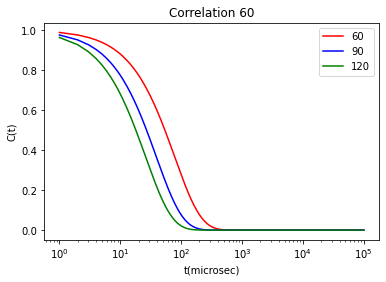

In [69]:
RelaxationRate(
    
    RefractiveIndex = 1.333, 

    HydroRadius = 6.6,
    #Units - nm
    
    Viscosity = 0.0089,
    #Viscosity in units g /cm*s (for all intents and purposes 100 mPa*s = 1 g /cm*s)
    
)